# AM205: Final Project
## Bounding the Human Tendency to Associate Like with Like
### Maleah Fekete and Jordan Sosa

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import beta
from scipy import spatial
import random
from operator import add, sub
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import truncnorm
import networkx as nx
import networkx.algorithms.community as nxcom

In [5]:
k = None
N = 100

In [43]:
if k is None:
    k = int(N*1.3)
    
W = np.zeros((N,15))
# Create personal interests
W[:,:10] = np.random.randint(11,size=10*N).reshape(N, 10) 
# create gender
W[:,10] = np.random.randint(2, size=N) 
# create age
W[:,11] = np.random.beta(1.75,3,size=N)*10 # 10 puts it on same scale as other characteristics
W[:,11] = np.round(W[:,11])
# create location/home
W[:,12:15] = np.random.randn(N,3)
K = np.random.choice([0, 1], size=N*k).reshape(N, k)

In [55]:
with np.printoptions(threshold=np.inf):
    print(K)

[[0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0
  0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1
  0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1
  1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1]
 [1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0
  1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0
  0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1
  1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1]
 [0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0
  1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1
  0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1
  1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1]
 [1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1
  1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1
  0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1

In [53]:
np.random.randn(N, 3)

array([[ 0.32907506, -0.33593879, -0.39569681],
       [ 0.58480075, -0.21946591, -0.9899485 ],
       [-0.18754587,  0.12140942, -1.51302812],
       [ 1.35232951, -0.67751952,  1.34336358],
       [-1.92129676, -2.08700145,  0.69829083],
       [-0.21031075,  0.18813342, -0.88864397],
       [ 0.55744096, -2.26355159,  0.98627989],
       [-0.34278345, -0.01967052, -0.47543509],
       [-0.36887668,  1.02570431,  1.36282081],
       [ 0.74966575, -1.12657073, -0.75840735],
       [-1.41325481,  0.94744448,  1.23694075],
       [-0.32548595,  2.19382931,  0.56269278],
       [ 0.0378667 , -0.03549675,  0.11178022],
       [-1.2427234 ,  0.69450032, -1.40373743],
       [-0.89919358, -0.14053142,  0.15368188],
       [-1.07972145,  1.05449023,  1.27802348],
       [ 1.1181202 ,  0.86179385,  0.71636694],
       [ 1.92292452, -0.3546886 , -1.41794547],
       [ 0.92407397, -1.9178611 , -1.65232684],
       [ 0.33014208,  2.29219073,  0.7091164 ],
       [ 0.03928331,  0.62818409,  0.391

In [51]:
W[:,11] = np.random.beta(1.75,3,size=N)*10 # 10 puts it on same scale as other characteristics
W[:,11] = np.round(W[:,11])
with np.printoptions(threshold=np.inf):
    print(W[:, 11])

[0. 6. 1. 4. 4. 2. 1. 1. 2. 5. 1. 5. 1. 2. 5. 2. 3. 6. 3. 5. 2. 4. 2. 7.
 2. 2. 2. 2. 3. 7. 7. 2. 1. 2. 8. 4. 4. 4. 7. 1. 1. 9. 4. 2. 1. 2. 2. 1.
 6. 5. 2. 4. 2. 7. 2. 3. 6. 5. 6. 4. 2. 4. 2. 6. 7. 5. 1. 3. 4. 5. 1. 6.
 1. 6. 2. 8. 3. 3. 8. 4. 3. 6. 3. 5. 1. 2. 6. 3. 7. 3. 3. 4. 3. 3. 3. 1.
 2. 3. 3. 2.]


In [20]:
W = np.zeros((N,15))
print(W)
print(np.shape(W)[0])
print(np.shape(W)[1])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
100
15


In [42]:
np.random.beta(1.75,3,size=N)*10 

array([6.01546005, 3.78330418, 4.54343398, 1.95695763, 0.88016789,
       5.02134185, 2.44436481, 1.96092323, 4.99931171, 1.81499792,
       5.91149307, 3.10504656, 3.85933873, 2.42157983, 3.47302738,
       1.18313553, 4.05736313, 1.34177555, 0.75554336, 3.55455549,
       4.14599467, 1.54246551, 4.3504375 , 4.71240669, 2.85326813,
       2.15270419, 2.99575199, 5.27193648, 0.46438327, 2.82556486,
       4.40713171, 3.88256854, 2.52430738, 6.13294157, 3.4070045 ,
       5.52971829, 5.20061491, 2.53277678, 0.23088867, 3.53570123,
       1.55112191, 4.18939332, 1.66885799, 7.4033227 , 4.66307555,
       8.05396866, 0.76455318, 4.13641225, 5.64199909, 1.39420256,
       5.38390709, 4.88425031, 3.87828292, 2.57325133, 4.1012099 ,
       3.71627639, 4.38264617, 0.36937421, 1.89121766, 2.1318138 ,
       3.10643332, 4.49630764, 3.79276275, 3.84366988, 1.58692949,
       3.3105869 , 5.35194732, 5.91346212, 0.83990158, 6.72982765,
       5.95900458, 4.13625031, 2.4891676 , 2.13659017, 3.93996

In [41]:
np.random.randn(N, 3)

array([[ 2.48689858e-01, -4.78789428e-01, -3.13801889e-01],
       [-9.31005193e-01,  1.05032937e+00,  2.40962019e-01],
       [ 1.22251379e+00, -2.80911785e-01, -1.64160747e+00],
       [ 1.50551356e+00, -2.56206294e-01,  2.65709333e+00],
       [-9.65049375e-02, -1.60984291e-02,  7.62454448e-02],
       [-1.92379862e-01,  6.91902165e-01, -1.57360458e+00],
       [ 4.68742704e-01,  7.49543282e-01,  8.46110387e-01],
       [-1.32141357e-01,  2.04828365e-01,  3.00422031e-01],
       [ 1.31751845e-01,  7.73215271e-01,  1.55170917e+00],
       [ 1.77553124e-01,  5.15537640e-02,  5.18197612e-02],
       [-1.41238365e+00, -1.42958219e+00, -1.91236489e+00],
       [-1.28700391e+00,  3.03135440e-01, -4.82859499e-01],
       [ 1.67241640e-01, -3.24719487e-01,  6.39710779e-01],
       [ 7.04091057e-01,  4.66865931e-02, -1.74406986e+00],
       [-5.79585947e-01, -4.27165404e-01, -3.53735103e-01],
       [-8.79455188e-01, -4.26516395e-01,  1.61091414e+00],
       [-7.50137268e-01, -4.77278220e-01

In [34]:
W[:,:10] = np.random.randint(11,size=10*N).reshape(N, 10)
print(W[:,:10])

with np.printoptions(threshold=np.inf):
    print(W)

[[ 2.  3.  7.  1.  6.  9. 10.  3.  6.  5.]
 [ 5.  5.  0.  2. 10.  5.  8.  8.  7.  1.]
 [ 8.  4.  4.  8.  9.  1.  9.  0.  8.  2.]
 [ 4.  0.  2.  1.  3.  1.  9. 10.  9.  7.]
 [ 7.  6. 10.  0.  4.  5.  0.  1.  4.  3.]
 [ 8.  9.  7.  5.  3.  9.  3.  3. 10.  0.]
 [ 0.  5.  9.  8. 10.  3.  2.  9.  9.  1.]
 [ 3.  8. 10.  8.  8.  9.  4.  2. 10.  7.]
 [ 9.  2.  9.  2.  1.  0.  8.  1.  3.  1.]
 [ 6.  4.  6.  3.  5.  6.  8.  2.  8.  4.]
 [ 4.  5.  7.  6.  8.  8.  8.  1.  8.  4.]
 [ 6.  0.  4.  1.  2.  3.  6.  6.  4.  3.]
 [ 0.  3.  8.  1.  4.  4.  2.  2. 10.  2.]
 [ 7.  8.  1.  8.  2.  6.  1.  3.  4.  4.]
 [ 9.  0. 10.  8.  7.  4.  4.  8.  5.  2.]
 [ 1.  2.  1. 10. 10.  3.  6.  7.  1.  9.]
 [ 1.  4.  1.  4.  9.  8.  9.  8.  3.  1.]
 [10.  8.  6.  7.  0.  9.  1.  6.  5.  9.]
 [ 8.  1.  2.  5. 10.  9. 10.  6.  1.  6.]
 [ 4.  5.  4.  8.  4.  2.  3.  8.  8.  6.]
 [ 8.  7.  7.  7.  3.  4.  1.  4.  2.  7.]
 [ 4.  5. 10.  0. 10. 10.  0.  6.  8.  5.]
 [ 3.  1.  4.  8.  6.  2.  4.  5.  8.  3.]
 [ 0.  1.  

In [40]:
temp = np.random.choice([0, 1], size=N*k)
with np.printoptions(threshold=np.inf):
    print(temp)

[0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0
 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0
 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1
 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0
 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0
 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0
 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1
 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1
 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1
 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0
 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1
 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1
 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0
 1 0 0 1 1 0 1 0 0 1 0 1 

# Simulation Setup
  
## Create:
- Individuals with varying personal characteristics
- Similarity matrix exponentiated by a homophily constant 
- Organization event quality matrix
- Retention matrix (to use after interaction matrix is created)

In [3]:
def make_individuals(N, k=None):
    """
    Parameters
    ----------
    N : int
        Number of individuals
    k : int, optional
        Number of organizations. If None it will np.round(np.sqrt(N))*2

    Returns
    -------
    W : matrix
        (N x 15) arrays of personal attributes
    K : matrix
        (N x k) membership of each individual in the organizations
    """
    if k is None:
        k = np.int(N*1.3)
    W = np.zeros((N,15))
    # Create personal interests
    W[:,:10] = np.random.randint(11,size=10*N).reshape(N, 10) 
    # create gender
    W[:,10] = np.random.randint(2, size=N) 
    # create age
    W[:,11] = np.random.beta(1.75,3,size=N)*10 # 10 puts it on same scale as other characteristics
    W[:,11] = np.round(W[:,11])
    # create location/home
    W[:,12:15] = np.random.randn(N,3) 
    K = np.random.choice([0, 1], size=N*k).reshape(N, k)
    return W, K
        
def bonding_matrix(indiv_mat, hom): 
    """
    Parameters
    ---------
    invid_mat: matrix of people and their characteristics
    --------
    Goal: 
    Create the similarity matrix where similarity is (1- cosine_distance(person_i, person_j)) ** hom
    Similarity will show how similar everyone is with each other
    Returns
    -------
    norm_simi : np.array
        the N x N array of similarity"""
    n = indiv_mat.shape[0]
    S = np.zeros((n,n))
    rows, cols = n, n
    simi = []
    # Nodes' similarity defined by their cosine
    for i in range(rows):
        for j in range(cols):
            simi.append(1 - spatial.distance.cosine(indiv_mat[i], indiv_mat[j]))
    # Scale similarity
    for el in range(len(simi)):
        norm_simi = (simi-min(simi))/(max(simi)-min(simi))
    simi = np.array(simi).reshape(n, n)
    # Incorporate homopholy
    simi = simi**hom
    norm_simi = MinMaxScaler().fit_transform(simi)
    return norm_simi

def make_organization_event_matrix(total_time_steps, k):
    """
    Parameters
    ---------
    k : number of organizations
    
    Returns
    -------
    O : matrix
        (Time_steps x k) each element is the event quality; if 0, there is no event
    """
    events = np.random.choice([0,1], k*total_time_steps, p=[.8,.2]).reshape(total_time_steps, k)
    qual_events = MinMaxScaler().fit_transform(np.random.randn(k, total_time_steps).reshape(total_time_steps, k))
    O = events*qual_events
    return O

def make_retention_matrix(interaction_matrix, current_t):
    """
    Returns
    -------
    I : matrix
        (Time_steps x N x N) 
        0 if no interactions in past 120 time steps (or up to current_t, if current_t<120)
        1 if interaction(s) in past 120 time steps (or up to current_t, if current_t<120)
    """
    if current_t < 120:
        # not enough time has passed for connections to fade
        I = interaction_matrix[:current_t]
    else:
        I = interaction_matrix[current_t-120 : current_t]
    return np.max(I, axis=0)

# Run Simulation

In [4]:
# Do it all at once! 

def simulation(N,T,hom):
    """
    Inputs:
    -------
    N = number of people
    T =  Total time steps
    hom = homophily
    
    Optional outputs:
    ----------------
    W, K, S, O defined below
    event_interact = what people interact when and at what events
    interaction_matrix = Who interacts at what time steps (strength of interaction?)
    interaction_range is interaction_matrix with strength of interaction, not 0 or 1
    
    Final outputs:
    --------------
    adjacency_matrix = history of people starting/maintaining relationships
    """
    # Individuals with their characteristics: W; Individuals & their orgs: K
    W, K = make_individuals(N)
    # Bonding/similarity matrix between individuals n x n, S
    S = bonding_matrix(W, hom)
    # Create organizations' events over time
    O = make_organization_event_matrix(T, len(K[0]))
    # Create event quality matrix dependent on people's interests in
    # organizations running the events and their membership
    event_qual = np.multiply(K, O[:,np.newaxis])
    event_interact = np.zeros((T,N,len(K[0]),N))
    interaction_matrix = np.zeros((T,N,N))
    adjacency_matrix = np.zeros((T,N,N))
    # Start at 1 because nothing happens at t = 0
    interact_range = np.zeros((T,N,N))
    for t in range(1,T):
        # Create noise for chance people interact from something
        # that's not an event
        noise = (np.random.random()-.49999)*.1
        # Have people interact at events
        event_interact[t] = np.multiply(event_qual[t].T,S[:,np.newaxis])
        # Have how many times people interact at each time step
        for i in range(N):
            for j in range(N):
                interaction_matrix[t][i,j] = np.sum(event_interact[t][i,:,j]) + noise
            interaction_matrix[t][i,i] = 0 # need 0's in diagonal to normalize
        # normalize
        interaction_matrix[t] = MinMaxScaler().fit_transform(interaction_matrix[t])
        interact_range[t] = interaction_matrix[t]
        for i in range(N):
            for j in range(N):
                 # go to 1s or 0s
                interaction_matrix[t][i,j] = np.round(interaction_matrix[t][i,j])
        # make retention matrix so we can look back at previous ties
        retention_matrix = make_retention_matrix(interaction_matrix,t)
        for i in range(N):
            for j in range(N):
                # limit number of ties
                if np.sum(adjacency_matrix[t][i,:]) >= 15:
                    break
                adjacency_matrix[t][i,j] = retention_matrix[i,j] + interaction_matrix[t][i,j]
                # keep adjacency to 0s and 1s
                if adjacency_matrix[t][i,j] > 0:
                    adjacency_matrix[t][i,j] = 1
    # we could return more than the adjacency matrix, 
    # which we did for troubleshooting, 
    # but our calculations only require the adjacency_matrix
    return adjacency_matrix


# Make graphing capabilities
In order to find how many communities exist and to visualize their distributions, we need to define some functions to make plots of communities by making nodes and connections of certain distances.

In [5]:
def set_node_community(group, communities):
    '''Add community to node attributes'''
    for i, j in enumerate(communities):
        for k in j:
            # Add 1 to save 0 for external edges
            group.nodes[k]['community'] = i + 1

def set_edge_community(group):
    '''Find internal edges and add their community to their attributes'''
    for i, j, in group.edges:
        if group.nodes[i]['community'] == group.nodes[j]['community']:
            # Internal edge, mark with community
            group.edges[i, j]['community'] = group.nodes[i]['community']
        else:
            # External edge, mark as 0
            group.edges[i, j]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign colors to vertexes.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)


def make_graph(adj):
    """
    Function: Make graph to visualize different communities by using the
    adjacency matrix at a certain time to see who's connected.
    Input:
    adj = matrix to be indexed at a certain time point
    Output:
    This function will generate a graph.
    """
    # convert to readable data
    people = nx.from_numpy_matrix(adj)
    # Set node and edge communities
    set_node_community(people, communities)
    set_edge_community(people)

    node_color = [get_color(people.nodes[i]['community']) for i in people.nodes]

    # Make community color for edges between members in the same community and external community edges
    external = [(v, w) for v, w in people.edges if people.edges[v, w]['community'] == 0]
    internal = [(v, w) for v, w in people.edges if people.edges[v, w]['community'] > 0]
    internal_color = ['black' for e in internal]

    people_pos = nx.spring_layout(people)

    plt.rcParams.update({'figure.figsize': (15, 10)})
    # Draw external edges
    nx.draw_networkx(people,pos=people_pos,node_size=0,edgelist=external,edge_color="silver")
    # Draw nodes and internal edges
    nx.draw_networkx(people,pos=people_pos,node_color=node_color,edgelist=internal,edge_color=internal_color)
    

# Create network evolution 

Value of homopholy: 0.0
1


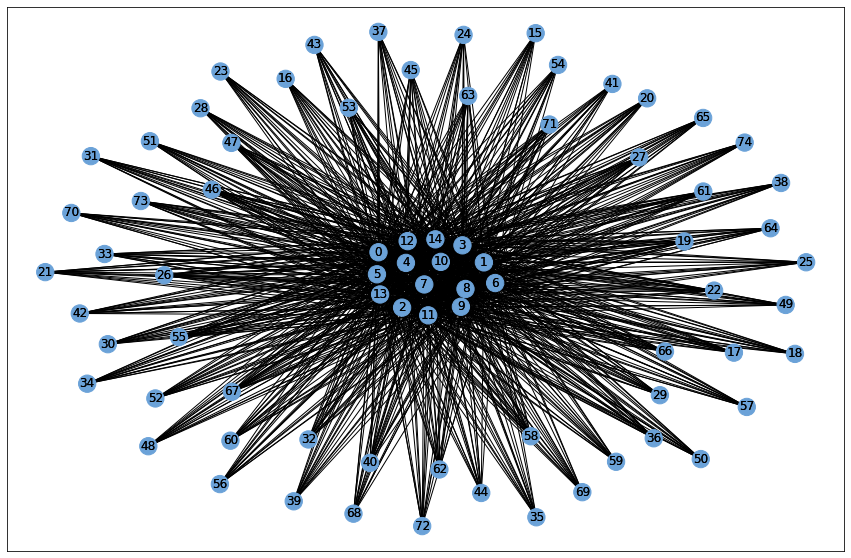

15


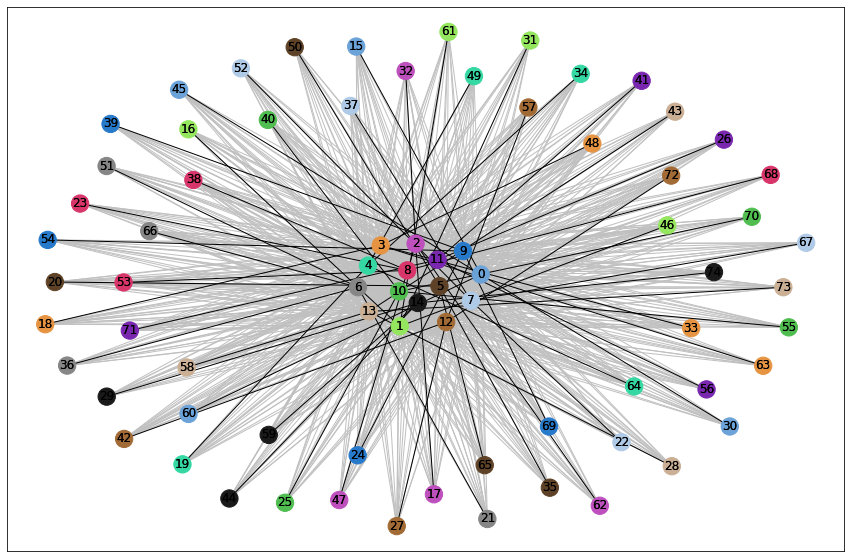

15


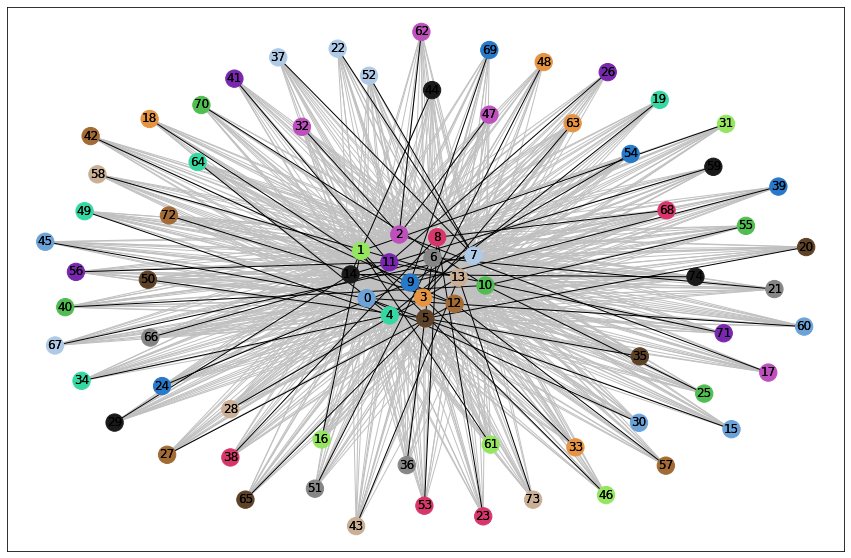

Value of homopholy: 0.1


KeyboardInterrupt: 

In [6]:
n = 75
time = 730
# Simulate homopholy values from 0 to 1
homoph = np.linspace(0,1,11)
adjacency = np.zeros((len(homoph),time,n,n))
adj = np.zeros((time,n,n))
for i in range(len(homoph)):
    h = homoph[i]
    print('Value of homopholy:',h)
    adjacency[i] = simulation(n,time,h)
    # get adjacency matrix that has time and number of people, but not 
    # set of range for homopholy
    adj = adjacency[i]
    for times in [1,365,729]:
    # Find the communities at each time step
        communities = sorted(nxcom.greedy_modularity_communities(nx.from_numpy_matrix(adj[times])), key=len, reverse=True)
        print(len(communities))
        make_graph(adj[times])
        plt.show()
        